In [1]:
# Importing the necessary libraries and frameworks

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



# Exploratory Data Analysis

In [2]:
# Loading & inspecting the data set
df = pd.read_csv('creditcard.csv')
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
92795,64109.0,-0.601251,1.255896,1.084574,-0.184366,0.266305,-0.494269,0.603235,0.080474,-0.508732,...,-0.259324,-0.622561,-0.065894,-0.038708,-0.080273,0.077985,0.351683,0.148049,2.69,0
24680,33328.0,-0.452864,0.182832,0.169133,-3.049969,2.160390,3.211687,-0.024089,0.638265,-1.208224,...,-0.097990,-0.368980,-0.175686,0.973067,0.084920,-0.587759,0.026346,-0.062270,7.95,0
95775,65461.0,-1.321790,-0.330498,1.306576,-1.009528,0.814733,-1.335414,0.812162,-0.139088,-1.857989,...,-0.425876,-1.220060,0.389532,0.298499,-0.007888,-0.994810,0.042198,0.140837,91.00,0
182376,125370.0,-1.164439,0.216165,1.764163,-3.080797,-0.047752,0.585089,0.087823,-0.082250,-0.359478,...,0.462856,1.125844,-0.657934,0.226355,0.801523,-0.146729,-0.836370,-0.206061,20.35,0
112717,72775.0,-1.021930,0.924694,0.983056,-1.367281,-0.529763,-0.396372,-0.101077,0.759365,0.080708,...,-0.032666,-0.184401,0.073111,0.014840,-0.330530,0.747020,0.162083,0.046643,7.61,0
98224,66571.0,1.237322,0.243815,0.172440,0.505730,-0.215366,-0.574754,-0.073264,0.006048,-0.094286,...,-0.266507,-0.838154,0.084792,-0.062395,0.206152,0.100144,-0.031983,0.015613,1.29,0
154764,102875.0,-1.038703,0.395165,0.640370,0.265188,1.853224,-1.181900,0.909476,-0.132927,0.537962,...,0.043744,0.162861,-0.241018,-0.075807,0.467452,-0.689933,0.031923,0.119479,11.76,0
108452,70907.0,0.030371,1.603173,-2.217304,1.610322,1.253953,-0.125151,0.216585,0.725883,-0.363643,...,0.035721,0.325625,0.440859,-1.008099,-0.802894,-0.295564,0.081967,-0.077848,9.95,0
127696,78430.0,-1.392736,0.293099,1.867629,0.985245,-1.439571,0.903502,0.585804,0.673219,-0.574938,...,0.283264,0.285691,0.365404,-0.037999,0.365550,-0.269100,-0.098001,0.036727,282.17,0
57059,47734.0,-0.502292,0.954784,1.533065,0.986349,0.646692,0.619866,0.911592,-0.158615,-0.048962,...,-0.143581,0.355734,-0.258870,-0.285733,-0.072372,-0.271936,0.211129,-0.192084,16.24,0


In [3]:
df.isna().sum() # checking for missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
# Check the unique values in the 'Class' column
print(df['Class'].unique())

[0 1]


0 - Legitimate
1 - Fraudulent

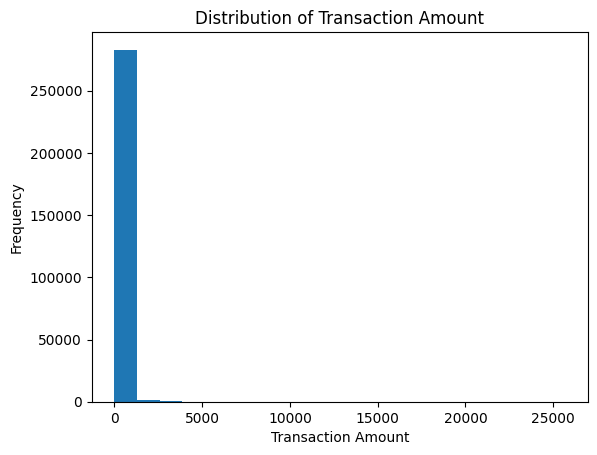

In [6]:
# Visualize the distribution of the 'Amount' feature
plt.hist(df['Amount'], bins=20)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amount')
plt.show()


The majority of the transactions are small which aligns with the expectation in credit card transactions that most purchases or transactions tend to be of relatively low value. This observation is typical in credit card fraud detection datasets, where fraudulent transactions often involve larger amounts compared to legitimate transactions.



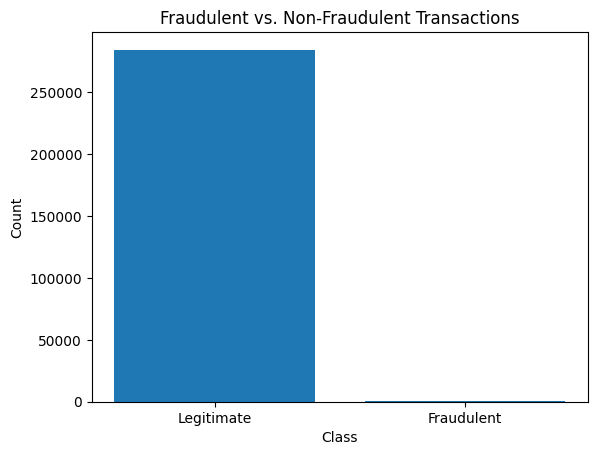

In [5]:
# Count the occurrences of each class
class_counts = df['Class'].value_counts()

# Create a bar plot
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])
plt.show()

As we can see here, the dataset is imbalanced. This means that with so few fraudulent credit card cases (called the minority class) the training model will spend most of its time on legitimate cases (the majority class) and as a result the model's predictive performance on the fraudulent cases may be lower due to this bias.

This is a common occurance in credit card fraud detection datasets and is nothing to worry about.

However, to address this issue we can employ various different techniques  


To address the issue of class imbalance, you can employ various techniques such as resampling (e.g., oversampling of the minority class or undersampling of the majority class), using different evaluation metrics (e.g., precision, recall, F1-score) that are sensitive to imbalanced datasets, or using algorithms specifically designed to handle imbalanced data (e.g., ensemble methods like Random Forest or gradient boosting).

The technique that I will be using in this project is Resampling.

# Feature Engineering

In [7]:
# Convert 'Time' feature to hours of the day
df['Hour'] = df['Time'] / 3600  # Convert seconds to hours
df['Hour'] = df['Hour'] % 24  # Modulus operation to get hours

In the previous cell I am converting the time feature into a more meaningful representation such as hours of the day.

In [8]:
# Define the time window

time_window = 1 # hours

# Calculate transaction frequency within the time window
df['TransactionFrequency'] = df.groupby('Hour')['Hour'].transform('count')/time_window

A new feature called 'TransactionFrequency' was created to represent the frequency of transactions within the previously specified time window.

I group the transactions by hour in order to be able to count the number of transactions within each hour. Then I divide by the time window to get the frequency (how many times in an hour)

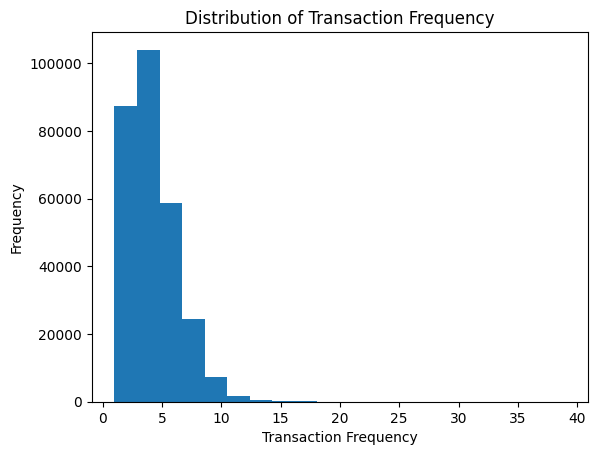

In [9]:
# Plotting the transaction frequency as a histogram

plt.hist(df['TransactionFrequency'], bins=20)
plt.xlabel('Transaction Frequency')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Frequency')
plt.show()

From the histogram, we can observe that transaction frequencies between 0 and 10 transactions per hour are the most frequent in the dataset. Specifically, the range of 0 to 5 transactions per hour has the highest frequency

# Data Preprocessing

In [10]:
# Splitting the data into features (X) and target variable (y)

X = df.drop('Class', axis=1)
y = df['Class']

In [11]:
# Splitting the data into testing, training and validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [12]:
# Standardize the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

With this I have standardized the data using StandardScalar.

I also split the dataset into training (60%), validation (20%) and testing (20%)

In [13]:
# Resampling to address the class imbalance

rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

Now, I am using random undersampling to balance the imbalanced dataset by matching the numer of fraudulent transactions. This is so by reducing the numbe rof samples in the majority class the model can focus more on learning from the minority class, improving it's ability to predict fraud.

# Model Training

In [16]:
# Training the logistic regression model

log_reg = LogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)

# Training the random forest model

rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

# Model Evaluation

In [19]:
# Evaluating the logistic regression model on the validation set

y_val_pred_log_reg = log_reg.predict(X_val_scaled)
print("Logistic Regression Classification Report:")
print(classification_report(y_val, y_val_pred_log_reg))


# Evaluating the random forest model on the validation set

y_val_pred_rf = rf.predict(X_val_scaled)
print("\nRandom Forest Classification Report:")
print(classification_report(y_val, y_val_pred_rf))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56863
           1       0.05      0.92      0.09        98

    accuracy                           0.97     56961
   macro avg       0.52      0.94      0.54     56961
weighted avg       1.00      0.97      0.98     56961


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.06      0.90      0.12        98

    accuracy                           0.98     56961
   macro avg       0.53      0.94      0.55     56961
weighted avg       1.00      0.98      0.99     56961



I have now trained the logisitc regression and random forest models on the resampled training data.

Following which I evaluated the model perfomance onthe validation set.

Based on the results from the report we can see that the Random Forest model outperforms the Logistic Regression model as it has a higher Recall, Precision and F1-Score. This indicats that the Random Forest Model is not only better at detecting and identifying fraudulent transaction but it also achieves a better balance between precision and recall for detecting the fraudulent transactions.

In [18]:
# Evaluating random forest model on test set
y_test_pred = rf.predict(X_test_scaled)

print("Final Model Classification Report:")
print(classification_report(y_test, y_test_pred))

Final Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56869
           1       0.06      0.92      0.12        93

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



Now that I have determined the Random Tree Model to be the best fit for this dataset I have used the model on the test set in order to obtain the final performance metrics.

# Thoughts and Feelings

Overall I found that the Random Forest model demonstrated a good performance in detecting fraudulent transactions, by achieving a high precision, recall, and F1-score.
The findings also suggest that the Random Forest model is suitable for credit card fraud detection tasks, especially when dealing with imbalanced datasets.